In [11]:
import sys
import os
import glob
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [12]:
train = pd.read_csv('../processed_data/train_v2.csv')

In [13]:
train.head(3)

,id,y,location,access,layout,age,direction,area,floor,bath_toilet,...,enviroment,structure,contact_period,max_floor,room_num,L,D,K,S,north
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,117,南東,20.01,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,...,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,7,2年間,12,1,0,0,1,0,0
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,538,NaN,16.50,5,専用トイレ／\tシャワー／\t温水洗浄便座,...,【スーパー】 1283m,2,2年間,10,1,0,0,0,0,0
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,102,南,22.05,12,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,...,【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,7,2年間,15,1,0,0,1,0,0


In [14]:
print(max(train['y']),min(train['y']))

2500000 25000


(array([5.000e+00, 1.000e+01, 2.600e+01, 9.000e+00, 4.400e+01, 3.600e+01,
        1.300e+02, 8.900e+01, 2.870e+02, 2.140e+02, 4.600e+02, 3.540e+02,
        6.540e+02, 4.200e+02, 8.860e+02, 5.530e+02, 1.032e+03, 5.610e+02,
        9.450e+02, 4.930e+02, 7.770e+02, 8.230e+02, 7.590e+02, 8.550e+02,
        7.800e+02, 8.060e+02, 8.200e+02, 8.220e+02, 6.650e+02, 7.440e+02,
        6.690e+02, 8.570e+02, 6.990e+02, 7.050e+02, 6.550e+02, 5.870e+02,
        5.130e+02, 6.220e+02, 5.380e+02, 3.940e+02, 5.530e+02, 3.910e+02,
        5.480e+02, 3.210e+02, 4.940e+02, 3.000e+02, 4.660e+02, 1.990e+02,
        3.520e+02, 1.720e+02, 3.260e+02, 1.560e+02, 3.020e+02, 2.170e+02,
        2.770e+02, 1.480e+02, 2.080e+02, 1.480e+02, 2.660e+02, 1.270e+02,
        1.450e+02, 1.460e+02, 1.790e+02, 1.020e+02, 1.520e+02, 1.470e+02,
        1.540e+02, 1.000e+02, 1.120e+02, 1.350e+02, 1.150e+02, 1.080e+02,
        8.200e+01, 9.900e+01, 1.040e+02, 7.800e+01, 6.200e+01, 6.100e+01,
        1.140e+02, 3.500e+01, 6.500e+0

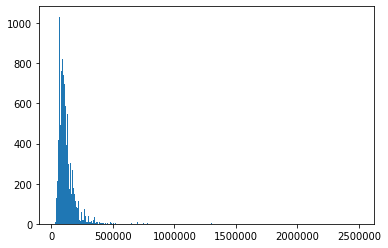

In [15]:
plt.hist(train['y'],range=(min(train['y']),max(train['y'])),bins=1000)

(array([1.2900e+02, 3.5220e+03, 1.1444e+04, 1.0883e+04, 4.0860e+03,
        1.1480e+03, 1.8600e+02, 5.6000e+01, 1.3000e+01, 3.0000e+00]),
 array([10.1266311 , 10.58714812, 11.04766514, 11.50818216, 11.96869918,
        12.4292162 , 12.88973322, 13.35025023, 13.81076725, 14.27128427,
        14.73180129]),
 <a list of 10 Patch objects>)

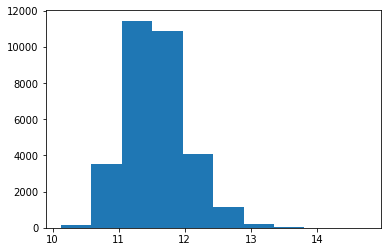

In [16]:
plt.figure(facecolor = 'white')
plt.hist(np.log(train['y']))

In [17]:
np.log(train['y'])

0        11.225243
1        11.238489
2        11.608236
3        11.918391
4        11.211820
           ...    
31465    11.289782
31466    10.905956
31467    11.736069
31468    11.492723
31469    11.302204
Name: y, Length: 31470, dtype: float64

In [18]:
np.exp(np.log(train['y']))

0         75000.0
1         76000.0
2        110000.0
3        150000.0
4         74000.0
           ...   
31465     80000.0
31466     54500.0
31467    125000.0
31468     98000.0
31469     81000.0
Name: y, Length: 31470, dtype: float64

In [19]:
train['y']

0         75000
1         76000
2        110000
3        150000
4         74000
          ...  
31465     80000
31466     54500
31467    125000
31468     98000
31469     81000
Name: y, Length: 31470, dtype: int64

### access の前処理　

- とりあえず駅から徒歩何分かについて、最短と平均を保持
- 後のために駅名も保持と思ったけど
    - そもそも駅の数が多すぎる
    - フォーマットにばらつきが多すぎる
    ので却下
 - "徒歩〇〇分"は必ず入っているのでとりあえず時間はそこから抽出

In [20]:
train = pd.read_csv('../processed_data/train_v2.csv')
test = pd.read_csv('../processed_data/test_v2.csv')

In [21]:
access = pd.concat([train['access'],test['access']]).reset_index(drop=True)
access

0        都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...
1        都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...
2        京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...
3        総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...
4        京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...
                               ...                        
62727    埼京線\t板橋駅\t徒歩3分\t\t都営三田線\t新板橋駅\t徒歩9分\t\t東武東上線\t...
62728    都営新宿線\t岩本町駅\t徒歩2分\t\t山手線\t秋葉原駅\t徒歩4分\t\t日比谷線\t...
62729    都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t...
62730    有楽町線\t麹町駅\t徒歩3分\t\t丸ノ内線(池袋－荻窪)\t四ツ谷駅\t徒歩4分\t\t...
62731    都営浅草線\t西馬込駅\t徒歩8分\t\t東急池上線\t池上駅\t徒歩19分\t\t都営浅草...
Name: access, Length: 62732, dtype: object

In [22]:
walk_time = []
for a in access:
    if '徒歩' in a:
        tmp_l = []
        
        for t in re.findall(r'徒歩\d+分',a):
            tmp = int(re.search(r'\d+',t).group())
            tmp_l.append(tmp)
            
    walk_time.append(tmp_l)     

In [23]:
walk_time

[[4, 14, 7],
 [5, 9, 20],
 [6, 7, 17],
 [9, 3, 14],
 [5, 7, 17],
 [2, 10, 10],
 [4, 25, 1],
 [7, 16, 20],
 [3, 10, 12],
 [8, 4, 7],
 [4, 16, 26],
 [15, 7],
 [11, 11, 18],
 [8, 4],
 [10, 12, 10],
 [8, 12, 22],
 [7, 21, 21],
 [8, 30],
 [5, 4, 10],
 [5, 10, 8],
 [11, 14, 31],
 [6, 6, 8],
 [6, 11, 22],
 [13, 12, 17],
 [2, 15, 20],
 [4, 15, 19],
 [5, 7, 10],
 [12, 10, 27],
 [5, 23, 29],
 [10, 8, 12],
 [7, 12, 9],
 [11, 18],
 [12, 16, 23],
 [10, 25, 28],
 [5, 2, 14],
 [8, 20, 27],
 [10, 18, 26],
 [22, 2, 6],
 [1, 9],
 [19, 19, 30],
 [10, 11, 13],
 [6, 9, 16],
 [12, 12, 16],
 [10, 11, 19],
 [9, 20, 28],
 [9, 11, 20],
 [7, 13, 9],
 [7, 9, 9],
 [3, 4, 11],
 [8, 12, 13],
 [15, 21, 21],
 [7, 5, 14],
 [12, 16],
 [12, 15, 14],
 [9, 9, 19],
 [3, 15, 15],
 [3, 4, 5],
 [1, 5, 9],
 [9, 13, 14],
 [10, 10, 15],
 [15, 25, 28],
 [10],
 [7, 4, 7],
 [5, 15, 21],
 [5, 7, 20],
 [10, 12, 13],
 [9, 10, 3],
 [11, 12, 12],
 [11, 11, 11],
 [5, 4, 17],
 [10, 11, 16],
 [19, 18, 29],
 [18],
 [18, 21, 19],
 [7, 9, 9],


In [24]:
pd.Series(walk_time)

0          [4, 14, 7]
1          [5, 9, 20]
2          [6, 7, 17]
3          [9, 3, 14]
4          [5, 7, 17]
             ...     
62727      [3, 9, 10]
62728       [2, 4, 6]
62729    [10, 20, 15]
62730       [3, 4, 9]
62731     [8, 19, 20]
Length: 62732, dtype: object

In [25]:
def processing_walk_time(access):
    walk_time = []
    min_time = []
    avg_time = []
    for a in access:
        if '徒歩' in a:
            tmp_l = []

            for t in re.findall(r'徒歩\d+分',a):
                tmp = int(re.search(r'\d+',t).group())
                tmp_l.append(tmp)

        walk_time.append(tmp_l)
        min_time.append(np.array(tmp_l).min())
        avg_time.append(np.array(tmp_l).mean())
    
    return walk_time, min_time, avg_time

In [26]:
a, b , c= processing_walk_time(access)

In [27]:
print(len(a),len(b),len(c))

62732 62732 62732


### locationの前処理

- すべて東京都23区内
- 1.yのmeanを昇順にしてcumsumを見て、閾値を設けてグルーピング
- 2.yのmeanをstandardscaleにしてそれを用いる（相対的な家賃への影響を反映できそう）　

In [66]:
ku23 = ['千代田区','中央区','港区','新宿区','文京区','台東区','墨田区','江東区','品川区','目黒区',
        '大田区','世田谷区','渋谷区','中野区','杉並区','豊島区','北区','荒川区','板橋区','練馬区',
        '足立区','葛飾区','江戸川区']

In [67]:
len(ku23)

23

In [68]:
location = pd.concat([train['location'],test['location']]).reset_index(drop=True)
location

0              東京都北区滝野川３丁目
1              東京都中央区月島３丁目
2              東京都渋谷区笹塚２丁目
3        東京都杉並区高円寺南２丁目23-2
4           東京都葛飾区金町３丁目7-2
               ...        
62727         東京都豊島区上池袋４丁目
62728        東京都千代田区岩本町２丁目
62729     東京都中野区江古田３丁目14-3
62730           東京都千代田区二番町
62731         東京都大田区南馬込６丁目
Name: location, Length: 62732, dtype: object

In [79]:
l = []
for loc in train['location']:
    for ku in ku23:
        if ku in loc:
            l.append(ku)

In [80]:
train['23ku'] = pd.Series(l)

In [81]:
train.groupby(by='23ku').describe()['y']

,count,mean,std,min,25%,50%,75%,max
23ku,,,,,,,,
世田谷区,3023.0,113781.270261,56556.480094,30000.0,74000.0,103000.0,136000.0,690000.0
中央区,1279.0,180887.865520,73472.995282,40000.0,121750.0,178000.0,211500.0,620000.0
中野区,1211.0,101578.398018,45599.679076,27000.0,68000.0,92000.0,122750.0,385000.0
北区,1045.0,99506.602871,45337.323020,31000.0,70000.0,89000.0,115000.0,420000.0
千代田区,457.0,182706.236324,114515.251653,68000.0,122000.0,151000.0,198000.0,980000.0
台東区,932.0,127625.944206,47354.606193,32000.0,99420.0,118000.0,150000.0,550000.0
品川区,1272.0,124609.473270,65400.524930,30000.0,87000.0,104500.0,144500.0,720000.0
墨田区,1010.0,116201.346535,40826.780448,39500.0,89000.0,105000.0,142375.0,350000.0
大田区,2000.0,106981.675000,52990.714596,28000.0,78000.0,95000.0,123000.0,1450000.0


In [92]:
train.groupby(by='23ku').mean().index

Index(['世田谷区', '中央区', '中野区', '北区', '千代田区', '台東区', '品川区', '墨田区', '大田区', '文京区',
       '新宿区', '杉並区', '板橋区', '江戸川区', '江東区', '渋谷区', '港区', '目黒区', '練馬区', '荒川区',
       '葛飾区', '豊島区', '足立区'],
      dtype='object', name='23ku')

<BarContainer object of 23 artists>

/home/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19990 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35895 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20013

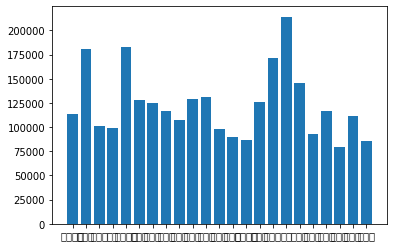

In [95]:
plt.bar(train.groupby(by='23ku').mean().index,train.groupby(by='23ku').mean()['y'])

- 中央区、千代田区、渋谷、港、目黒

In [113]:
m = train.groupby(by='23ku').mean()['y'].sort_values()
m

23ku
葛飾区      79114.657591
足立区      85872.540849
江戸川区     86592.302585
板橋区      90003.879310
練馬区      92724.943493
杉並区      97708.174675
北区       99506.602871
中野区     101578.398018
大田区     106981.675000
豊島区     110916.884343
世田谷区    113781.270261
墨田区     116201.346535
荒川区     116817.881944
品川区     124609.473270
江東区     126217.110743
台東区     127625.944206
文京区     128562.070628
新宿区     130573.957482
目黒区     145674.389052
渋谷区     171839.786802
中央区     180887.865520
千代田区    182706.236324
港区      214061.744878
Name: y, dtype: float64

<BarContainer object of 23 artists>

/home/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39166 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36275 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/toshiya/.pyenv/versions/3.7.4/envs/mynavi_2019/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31435

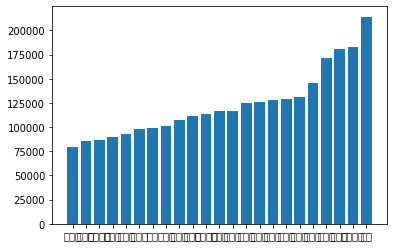

In [127]:
plt.bar(m.index,m)

- グループ分け１：差分をcumsumして閾値で分ける

In [128]:
s = 0
g = []
grouping = True
while grouping == True:
    dif_sum = 0
    for i in range(s,len(m)-1):
        dif = m[i+1] - m[i]
        dif_sum += dif
        
        if dif_sum <20000:
            g.append(m.index[i])
        
        else:
            g.append(m.index[i])
            g.append('')
            s = i+1
            if s==len(m)-1:
                grouping = False
                g.append(m.index[s])
                break
            else:
                break

In [131]:
group1 = g
group1

['葛飾区',
 '足立区',
 '江戸川区',
 '板橋区',
 '練馬区',
 '杉並区',
 '',
 '北区',
 '中野区',
 '大田区',
 '豊島区',
 '世田谷区',
 '墨田区',
 '荒川区',
 '',
 '品川区',
 '江東区',
 '台東区',
 '文京区',
 '新宿区',
 '',
 '目黒区',
 '',
 '渋谷区',
 '中央区',
 '千代田区',
 '',
 '港区']

- グループ分け2:各区の家賃の平均を標準化したものでマッピング

In [135]:
from sklearn.preprocessing import StandardScaler

In [138]:
m.shape

(23,)

In [140]:
scaler = StandardScaler()
data_std = scaler.fit_transform(np.array(m).reshape(-1,1))

In [179]:
ku_m_std = pd.DataFrame({
    '23ku':m.index,
    '23ku_mean_std':[data_std[i][0] for i in range(len(data_std))]
})
ku_m_std

,23ku,23ku_mean_std
0,葛飾区,-1.280757
1,足立区,-1.083838
2,江戸川区,-1.062865
3,板橋区,-0.963455
4,練馬区,-0.884165
5,杉並区,-0.738958
6,北区,-0.686553
7,中野区,-0.626183
8,大田区,-0.468736
9,豊島区,-0.354067


In [180]:
ku_m_std.to_csv('../processed_data/23ku_mean_std.csv',index=False)

In [181]:
train.columns

Index(['id', 'y', 'location', 'access', 'layout', 'age', 'direction', 'area',
       'floor', 'bath_toilet', 'kitchen', 'broadcast_com', 'facilities',
       'parking', 'enviroment', 'structure', 'contact_period', 'max_floor',
       'room_num', 'L', 'D', 'K', 'S', 'north', '23ku'],
      dtype='object')

In [185]:
hoge = train.loc[:,['id','23ku']]

In [192]:
a = pd.merge(hoge,ku_m_std,on='23ku',sort=False).sort_values(by='id')

In [193]:
a

,id,23ku,23ku_mean_std
0,1,北区,-0.686553
1045,2,中央区,1.684829
2324,3,渋谷区,1.421175
3309,4,杉並区,-0.738958
5078,5,葛飾区,-1.280757
...,...,...,...
12156,31466,板橋区,-0.963455
28232,31467,世田谷区,-0.270601
29740,31468,江東区,0.091769
20815,31469,中野区,-0.626183


In [196]:
list(ku_m_std['23ku_mean_std'])

[-1.2807574098213284,
 -1.0838383537489147,
 -1.0628650998041507,
 -0.963454612411768,
 -0.8841650819596225,
 -0.7389579005058835,
 -0.6865532096858878,
 -0.6261828349388672,
 -0.468735870806376,
 -0.35406716765268814,
 -0.2706013619101045,
 -0.20008236695852455,
 -0.1821170416794129,
 0.044923401400534836,
 0.09176861038849397,
 0.1328208371225872,
 0.16009877672317527,
 0.2187234739900172,
 0.6587373980981039,
 1.4211751659457696,
 1.684828598882115,
 1.7378144005920697,
 2.651487648740651]

In [201]:
pd.set_option('display.max_columns', 100)
v3 = pd.read_csv('../processed_data/train_v3.csv')
v3

,id,y,location,access,layout,age,direction,area,floor,bath_toilet,kitchen,broadcast_com,facilities,parking,enviroment,structure,contact_period,log_y,max_floor,room_num,L,D,K,S,north,walk_time,min_time,avg_time,23ku,23ku_mean_std
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,117,南東,20.01,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,7,2年間,11.225243,12,1,0,0,1,0,0,"[4, 14, 7]",4,8.333333,北区,-0.686553
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,538,NaN,16.50,5,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,2,2年間,11.238489,10,1,0,0,0,0,0,"[5, 9, 20]",5,11.333333,中央区,1.684829
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,102,南,22.05,12,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,7,2年間,11.608236,15,1,0,0,1,0,0,"[6, 7, 17]",6,10.000000,渋谷区,1.421175
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,352,南,60.48,3,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,7,2年間\t※この物件は\t定期借家\tです。,11.918391,4,2,1,1,1,0,0,"[9, 3, 14]",3,8.666667,杉並区,-0.738958
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,379,南,39.66,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,1,2年間,11.211820,2,2,0,1,1,0,0,"[5, 7, 17]",5,9.666667,葛飾区,-1.280757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31465,31466,80000,東京都板橋区蓮根２丁目,都営三田線\t蓮根駅\t徒歩7分\t\t都営三田線\t西台駅\t徒歩10分\t\t都営三田線...,2DK,360,南,37.90,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t洗面台独立,ガスコンロ／\tコンロ2口／\t給湯,インターネット対応,エアコン付\tバルコニー／\t室内洗濯機置場\t公営水道／\t都市ガス,駐車場\t無,NaN,2,2年間,11.289782,3,2,0,1,1,0,0,"[7, 10, 17]",7,11.333333,板橋区,-0.963455
31466,31467,54500,東京都世田谷区太子堂５丁目17-1,東急田園都市線\t三軒茶屋駅\t徒歩6分\t\t東急世田谷線\t西太子堂駅\t徒歩4分\t\...,1R,475,西,12.04,4,専用バス／\t専用トイレ／\tシャワー,ガスコンロ／\tコンロ1口／\t給湯,NaN,エアコン付\tバルコニー／\tフローリング／\t室外洗濯機置場／\tタイル張り\t公営水道／...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 458m\t【スーパー】 540m\t【コンビニ】 131m\t【コンビニ】 ...,7,2年間,10.905956,4,1,0,0,0,0,0,"[6, 4, 13]",4,7.666667,世田谷区,-0.270601
31467,31468,125000,東京都江東区南砂４丁目,東西線\t南砂町駅\t徒歩5分\t\t都営新宿線\t大島(東京都)駅\t徒歩26分\t\t東...,3DK,550,南,60.00,3,バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座,ガスコンロ／\tコンロ2口,光ファイバー,シューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場\t都市ガス,駐輪場\t空有\tバイク置き場\t無,【コンビニ】 302m\t【コンビニ】 394m\t【コンビニ】 452m\t【コンビニ】 ...,2,2年間,11.736069,5,3,0,1,1,0,0,"[5, 26, 18]",5,16.333333,江東区,0.091769
31468,31469,98000,東京都中野区中野２丁目,中央線（快速）\t中野(東京都)駅\t徒歩4分\t\t丸ノ内線(池袋－荻窪)\t新中野駅\t...,1DK,132,南,29.59,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t3面採光／\t室内洗濯...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 485m\t【スーパー】 1051m\t【コンビニ】 476m\t【コンビニ】...,1,2年間,11.492723,2,1,0,1,1,0,0,"[4, 10, 15]",4,9.666667,中野区,-0.626183


In [203]:
v3.dtypes

id                  int64
y                   int64
location           object
access             object
layout             object
age                 int64
direction          object
area              float64
floor               int64
bath_toilet        object
kitchen            object
broadcast_com      object
facilities         object
parking            object
enviroment         object
structure           int64
contact_period     object
log_y             float64
max_floor           int64
room_num            int64
L                   int64
D                   int64
K                   int64
S                   int64
north               int64
walk_time          object
min_time            int64
avg_time          float64
23ku               object
23ku_mean_std     float64
dtype: object

In [ ]:
d